# IBM Cares Application - Clustering for Employee Sentiment Analysis during lockdown

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import random as rd

In [2]:
raw_data = pd.read_csv('Sample_Survey_Data_V 2.csv')
raw_data

,ClusterNumber,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,...,EM1,EM2,EM3,EM4,EM5,PHY1,PHY2,PHY3,PHY4,PHY5
0,1.0,IBM00001,F,3,NaN,3,1.0,1,1,0,...,4,5,4,5,4,4,4,5,4,5
1,NaN,IBM00002,F,4,NaN,4,2.0,1,1,0,...,5,4,5,4,5,4,5,4,5,4
2,NaN,IBM00003,F,3,NaN,3,1.0,1,1,0,...,4,4,4,5,4,4,4,5,4,5
3,NaN,IBM00004,F,4,NaN,4,2.0,1,1,0,...,4,5,4,5,4,5,4,4,4,5
4,NaN,IBM00005,F,4,NaN,4,3.0,1,1,0,...,5,4,5,4,5,4,5,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,IBM00078,F,2,NaN,3,NaN,0,0,0,...,1,2,1,1,2,4,5,4,5,5
78,NaN,IBM00079,F,2,NaN,4,NaN,0,0,0,...,2,2,1,2,1,5,5,4,4,4
79,NaN,IBM00080,M,2,NaN,3,NaN,0,0,0,...,1,1,2,1,1,5,4,5,4,4
80,NaN,IBM00081,M,2,NaN,4,NaN,0,0,0,...,1,1,2,1,1,4,4,4,4,4


In [3]:
raw_data.columns

Index(['ClusterNumber', 'RespondentUniqueID', 'Gender', 'Age Group',
       'Nationality ', 'BaseCountry', 'Profession', 'Marital Status',
       'Dependents', 'ChronicDisease', 'Medication ', 'PRF1', 'PRF2', 'PRF3',
       'PRF4', 'PRF5', 'EM1', 'EM2', 'EM3', 'EM4', 'EM5', 'PHY1', 'PHY2',
       'PHY3', 'PHY4', 'PHY5'],
      dtype='object')

In [4]:
#Copy into a separate dataframe for further calculations
data_avg = raw_data.copy()

#Avrege out Professional Satisfaction
cols_prf = ['PRF1','PRF2','PRF3', 'PRF4', 'PRF5']
data_avg['average_PRF'] = data_avg[cols_prf].astype(float).mean(axis=1)

#Avrege out Professional Emotional Satisfaction
cols_em = ['EM1','EM2','EM3', 'EM4', 'EM5']
data_avg['average_em'] = data_avg[cols_em].astype(float).mean(axis=1)

#Avrege out Physical Satisfaction
cols_phy = ['PHY1','PHY2','PHY3', 'PHY4', 'PHY5']
data_avg['average_phy'] = data_avg[cols_phy].astype(float).mean(axis=1) 

data_avg

,ClusterNumber,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,...,EM4,EM5,PHY1,PHY2,PHY3,PHY4,PHY5,average_PRF,average_em,average_phy
0,1.0,IBM00001,F,3,NaN,3,1.0,1,1,0,...,5,4,4,4,5,4,5,1.6,4.4,4.4
1,NaN,IBM00002,F,4,NaN,4,2.0,1,1,0,...,4,5,4,5,4,5,4,1.6,4.6,4.4
2,NaN,IBM00003,F,3,NaN,3,1.0,1,1,0,...,5,4,4,4,5,4,5,1.4,4.2,4.4
3,NaN,IBM00004,F,4,NaN,4,2.0,1,1,0,...,5,4,5,4,4,4,5,1.4,4.4,4.4
4,NaN,IBM00005,F,4,NaN,4,3.0,1,1,0,...,4,5,4,5,4,4,4,1.6,4.6,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,IBM00078,F,2,NaN,3,NaN,0,0,0,...,1,2,4,5,4,5,5,4.6,1.4,4.6
78,NaN,IBM00079,F,2,NaN,4,NaN,0,0,0,...,2,1,5,5,4,4,4,4.4,1.6,4.4
79,NaN,IBM00080,M,2,NaN,3,NaN,0,0,0,...,1,1,5,4,5,4,4,4.4,1.2,4.4
80,NaN,IBM00081,M,2,NaN,4,NaN,0,0,0,...,1,1,4,4,4,4,4,4.0,1.2,4.0


In [27]:
#Map male and female genders to a value
data_categorize = data_avg.copy()
data_categorize['Gender'] = data_categorize['Gender'].map({'F':0, 'M':1})

cols_gend_dep = ['Dependents', 'Marital Status', 'Age Group']
data_categorize['average_gend_dep'] = data_categorize[cols_gend_dep].astype(float).mean(axis=1) 

data_categorize

,ClusterNumber,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,...,PHY1,PHY2,PHY3,PHY4,PHY5,average_PRF,average_em,average_phy,gender_dep,average_gend_dep
0,1.0,IBM00001,0,3,NaN,3,1.0,1,1,0,...,4,4,5,4,5,1.6,4.4,4.4,0,1.666667
1,NaN,IBM00002,0,4,NaN,4,2.0,1,1,0,...,4,5,4,5,4,1.6,4.6,4.4,0,2.000000
2,NaN,IBM00003,0,3,NaN,3,1.0,1,1,0,...,4,4,5,4,5,1.4,4.2,4.4,0,1.666667
3,NaN,IBM00004,0,4,NaN,4,2.0,1,1,0,...,5,4,4,4,5,1.4,4.4,4.4,0,2.000000
4,NaN,IBM00005,0,4,NaN,4,3.0,1,1,0,...,4,5,4,4,4,1.6,4.6,4.2,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,IBM00078,0,2,NaN,3,NaN,0,0,0,...,4,5,4,5,5,4.6,1.4,4.6,0,0.666667
78,NaN,IBM00079,0,2,NaN,4,NaN,0,0,0,...,5,5,4,4,4,4.4,1.6,4.4,0,0.666667
79,NaN,IBM00080,1,2,NaN,3,NaN,0,0,0,...,5,4,5,4,4,4.4,1.2,4.4,1,0.666667
80,NaN,IBM00081,1,2,NaN,4,NaN,0,0,0,...,4,4,4,4,4,4.0,1.2,4.0,1,0.666667


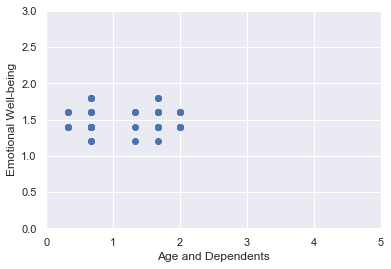

In [29]:
plt.scatter(data_categorize['average_gend_dep'], data_categorize['average_em'])
plt.xlabel('Age and Dependents')
plt.ylabel('Emotional Well-being')
plt.xlim(0,5)
plt.ylim(0,3)
plt.show()